In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl

In [ ]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X,y=mnist['data'],mnist['target']
X.shape,y.shape 

((70000, 784), (70000,))

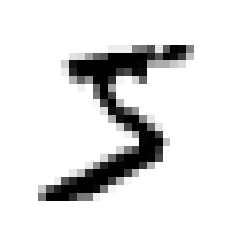

In [ ]:
some_digit=X[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.axis('off');

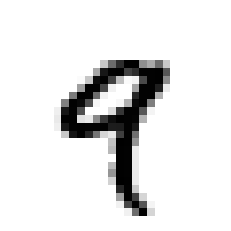

In [ ]:
digit=X[4]
digit_image=digit.reshape(28,28)
plt.imshow(digit_image,cmap=mpl.cm.binary)
plt.axis('off');

In [ ]:
y[0]

'5'

**to make the storage smaller **

In [ ]:
y=y.astype(np.uint8)

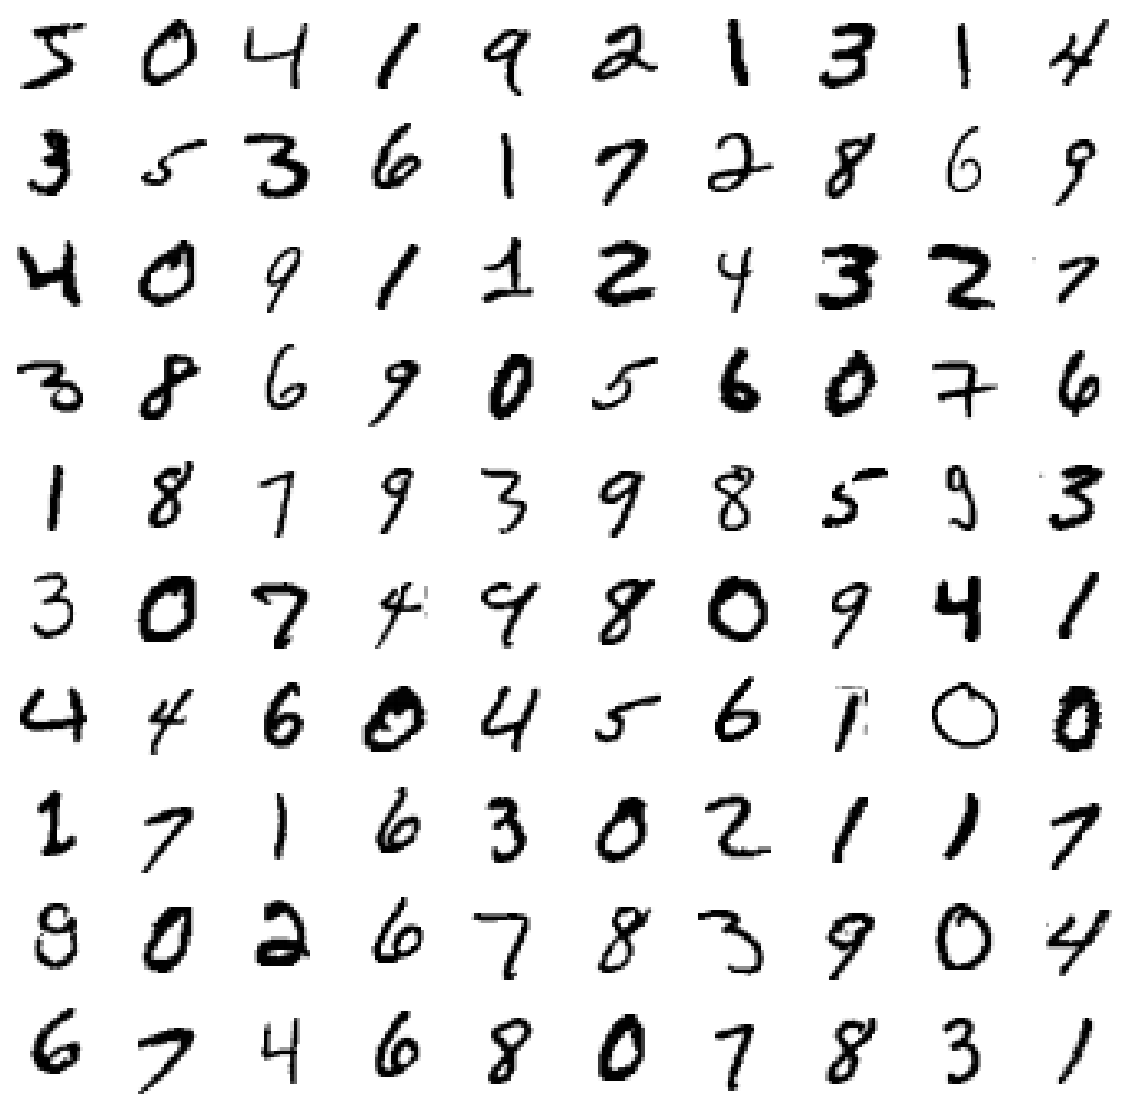

In [ ]:
N=100
example_images=X[:N]
plt.figure(figsize=(20,20))
for i,img in enumerate(example_images):
  plt.subplot(np.ceil(N**.5),np.ceil(N**.5),i+1)
  plt.imshow(img.reshape(28,28),cmap='binary')
  plt.axis('off');





In [ ]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

**Training a binary classification **

In [ ]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(max_iter=1000,tol=1e-3,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

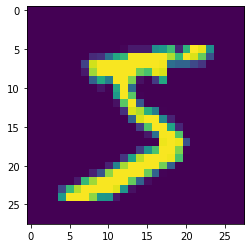

In [ ]:
plt.imshow(some_digit_image)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

# Performance Measures


### Measuring Accuracy Using Cross-Validation


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
kfolds=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
for train_index, test_index in kfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


##Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

##Precision and Recall

In [ ]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_predict)

0.8370879772350012

In [ ]:
recall_score(y_train_5,y_train_predict)

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_predict)

0.7325171197343846